In [8]:
import pandas as pd

data = pd.read_csv("titanic.csv") #считываем все данные из файла в данную переменную

In [9]:
#Какое количество мужчин и женщин ехало на корабле?

count_people = data['Sex'].value_counts()
print(f'На корабле ехало {count_people["male"]} мужчин и {count_people["female"]} женщин')

На корабле ехало 577 мужчин и 314 женщин


In [10]:
#Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров.

survived = data["Survived"].sum()
print('Доля выживших пассажиров - ', survived/data.shape[0])

Доля выживших пассажиров -  0.3838383838383838


Доля пассажиров первого класса среди всех пассажиров составляет -  0.24242424242424243


<AxesSubplot:title={'center':'Классы пассажиров'}>

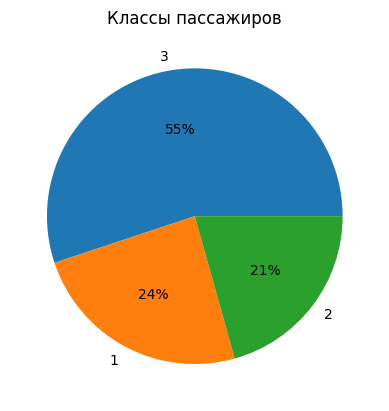

In [11]:
#Какую долю пассажиры первого класса составляли среди всех пассассажиров? 
#Постройте круговую диаграмму по всем классам пассажиров

pclass = data["Pclass"].value_counts()
print("Доля пассажиров первого класса среди всех пассажиров составляет - ", pclass[1]/data.shape[0])
pclass.plot(kind='pie', title="Классы пассажиров", autopct='%1.0f%%', ylabel='')

In [12]:
#Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 
#В чем статистическая разница между показателями медианы и среднего? (1) Выведите любой перцентиль возраста пассажиров. 
#Что показывает перцентиль в статистике? (2)

statistics = data['Age'].describe()
print('Средний возраст пассажиров - ', statistics['mean'])
print('Медиана возраста пассажиров - ', data['Age'].median())
print('25-ый перцентиль (первый квартиль) - ', statistics['25%'])

Средний возраст пассажиров -  29.69911764705882
Медиана возраста пассажиров -  28.0
25-ый перцентиль (первый квартиль) -  20.125


ОТВЕТ НА ВОПРОС 1: Медиана отличается от среднего тем, что среднее - это сумма всех значений в наборе данных, поделенная на количество значений, медиана — это среднее значение набора данных (то есть если расположить данные по  возрастанию, то это будет среднее среди всех значение). 
Медиана является конкретным значением из набора данных, в то время как среднее не обязательно будет таковым.

ОТВЕТ НА ВОПРОС 2: Перцентиль показывает, в какой части распределения находится данное значение(или, иначе говоря, сколько процентов значений из набора меньше или равны данному значению).

In [13]:
# Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch.
# Что показывает корреляция?

print('Корреляция Пирсона между признаками SibSp и Parch - ', data['SibSp'].corr(data['Parch'], method ='pearson'))

Корреляция Пирсона между признаками SibSp и Parch -  0.41483769862015646


Число братьев/сестер/супругов с числом родителей/детей имеет слабую положительную корреляцию.
Корреляция - это некоторая степень связи между 2-мя или несколькими независимыми явлениями. Взаимосвязь двух или нескольких случайных параметров. Если коэффициент корреляции по модулю стремится к 1, то величины зависимы, если стремится к 0, то независимы.

In [14]:
#Какое самое популярное женское имя на корабле?

names = []
for i, record in data.iterrows():
    if record['Sex'] == 'female':
        name = record['Name']
        index = name.find("(")
        if index == -1: #Если у женщины своя фамилия
            name = name[name.find(".")+2:]
            if name.find(" ")!=-1:
                name = name[:name.find(" ")]
            names.append(name)
        else:   #Если у женщины фамилия мужа
            name = name[index + 1:]
            names.append(name[:name.find(" ")])
name = pd.DataFrame({'Name':names}).value_counts().index[0][0]
print("Самое популярное женское имя на корабле - ", name)


Самое популярное женское имя на корабле -  Anna
